<a href="https://colab.research.google.com/github/robitussin/CCDATSCL_EXERCISES/blob/main/Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4

This exercise focuses on data visualization and interpretation using a real-world COVID-19 dataset. The dataset contains daily records of confirmed cases, deaths, recoveries, and active cases across countries and regions, along with temporal and geographic information.
The goal of this exercise is not only to create charts, but to choose appropriate visualizations, apply correct data aggregation, and draw meaningful insights from the data. You will work with time-based, categorical, numerical, and geographic variables, and you are expected to think critically about how design choices affect interpretation.

Your visualizations should follow good practices:
- Use clear titles, axis labels, and legends
- Choose chart types appropriate to the data and question
- Avoid misleading scales or cluttered designs
- Clearly explain patterns, trends, or anomalies you observe

Unless stated otherwise, you may filter, aggregate, or group the data as needed.

<img src="https://d3i6fh83elv35t.cloudfront.net/static/2020/03/Screen-Shot-2020-03-05-at-6.29.29-PM-1024x574.png"/>

In [1]:
%pip install jupyter ipywidgets tqdm kagglehub


Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install --upgrade kagglehub

Note: you may need to restart the kernel to use updated packages.


In [4]:

import os
import pandas as pd

path = r"C:\Users\NU-CCIT\Downloads\Exercise_4"

print("Path to dataset files:", path)
print(os.listdir(path))

Path to dataset files: C:\Users\NU-CCIT\Downloads\Exercise_4
['covid_19_clean_complete.csv', 'Exercise4.ipynb']


In [5]:
if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [7]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [8]:
df.query("`Country/Region` == 'Philippines'")

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
180,NaN,Philippines,12.879721,121.774017,2020-01-22,0,0,0,0,Western Pacific
441,NaN,Philippines,12.879721,121.774017,2020-01-23,0,0,0,0,Western Pacific
702,NaN,Philippines,12.879721,121.774017,2020-01-24,0,0,0,0,Western Pacific
963,NaN,Philippines,12.879721,121.774017,2020-01-25,0,0,0,0,Western Pacific
1224,NaN,Philippines,12.879721,121.774017,2020-01-26,0,0,0,0,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
47943,NaN,Philippines,12.879721,121.774017,2020-07-23,74390,1871,24383,48136,Western Pacific
48204,NaN,Philippines,12.879721,121.774017,2020-07-24,76444,1879,24502,50063,Western Pacific
48465,NaN,Philippines,12.879721,121.774017,2020-07-25,78412,1897,25752,50763,Western Pacific
48726,NaN,Philippines,12.879721,121.774017,2020-07-26,80448,1932,26110,52406,Western Pacific


## A. Time-Based Visualizations

1. Global Trend `(5 pts)`

Aggregate the data by Date and create a line chart showing the global number of confirmed COVID-19 cases over time.

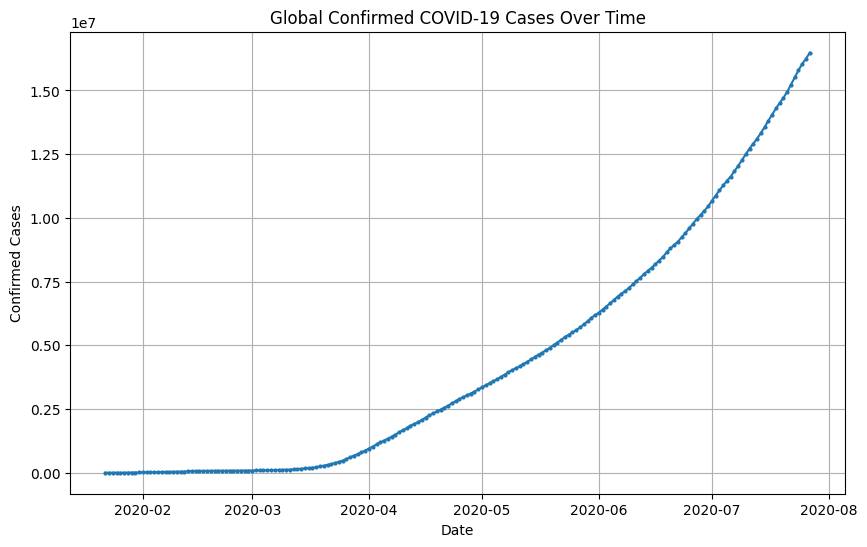

In [9]:
# put your answer here
import matplotlib.pyplot as plt

# Convert Date to datetime objects for correct plotting
df['Date'] = pd.to_datetime(df['Date'])

# Aggregate confirmed cases by Date
global_trend = df.groupby('Date')['Confirmed'].sum()

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(global_trend.index, global_trend.values, marker='o', markersize=2)
plt.title('Global Confirmed COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.grid(True)
plt.show()

2. Country-Level Trends `(5 pts)`

Select three countries and visualize their confirmed case counts over time on the same plot.

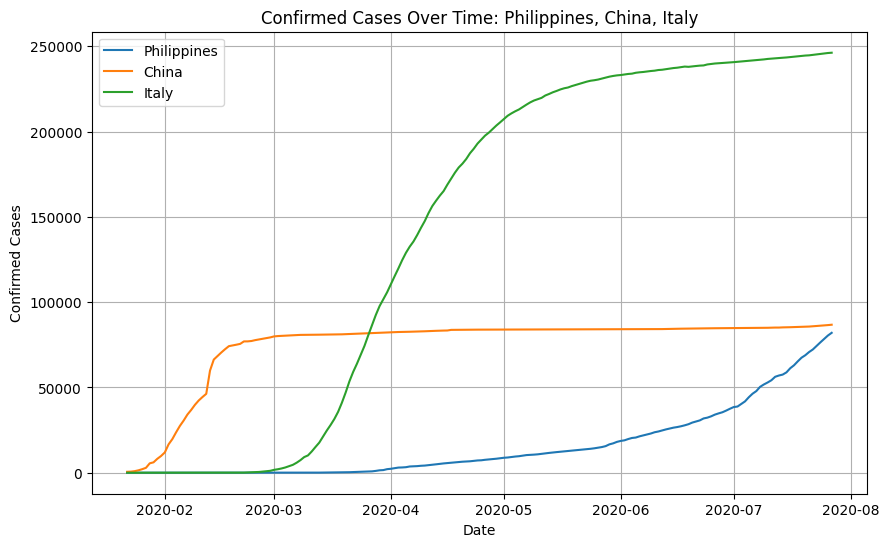

In [11]:
# put your answer here
countries = ['Philippines', 'China', 'Italy']
subset = df[df['Country/Region'].isin(countries)]

# Group by Date and Country to handle potential Province/State splits
country_trends = subset.groupby(['Date', 'Country/Region'])['Confirmed'].sum().unstack()

plt.figure(figsize=(10, 6))
for country in countries:
    plt.plot(country_trends.index, country_trends[country], label=country)

plt.title('Confirmed Cases Over Time: Philippines, China, Italy')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid(True)
plt.show()

3. Active vs Recovered `(5 pts)`

For a selected country, create a line chart showing Active and Recovered cases over time.

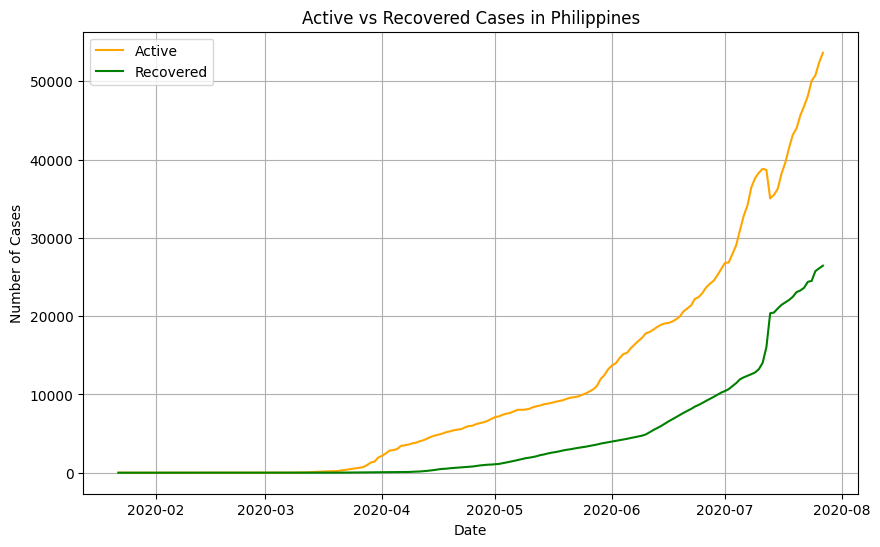

In [12]:
# put your answer here
country = 'Philippines'
subset_ar = df[df['Country/Region'] == country]

# Group by Date
ar_trends = subset_ar.groupby('Date')[['Active', 'Recovered']].sum()

plt.figure(figsize=(10, 6))
plt.plot(ar_trends.index, ar_trends['Active'], label='Active', color='orange')
plt.plot(ar_trends.index, ar_trends['Recovered'], label='Recovered', color='green')

plt.title(f'Active vs Recovered Cases in {country}')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()

## B: Comparative Visualizations

4. Country Comparison `(5 pts)`

Using data from a single date, create a bar chart showing the top 10 countries by confirmed cases.

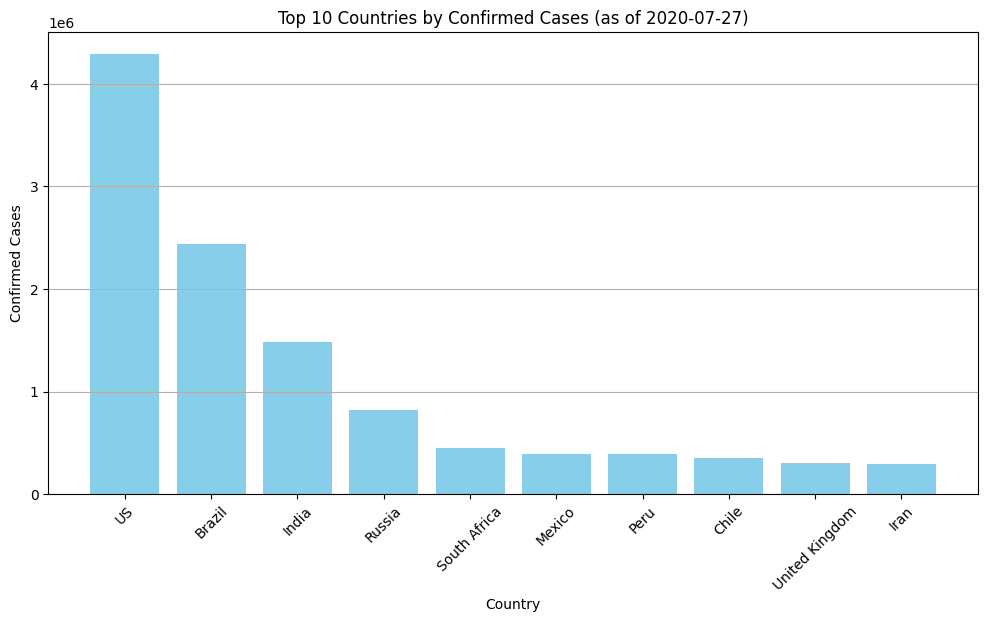

In [13]:
# put your answer here
# Get the latest date
latest_date = df['Date'].max()

# Filter for the latest date and aggregate by Country/Region
top10 = df[df['Date'] == latest_date].groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(10)

# Create bar chart
plt.figure(figsize=(12, 6))
plt.bar(top10.index, top10.values, color='skyblue')
plt.title(f'Top 10 Countries by Confirmed Cases (as of {latest_date.date()})')
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

5. WHO Region Comparison `(5 pts)`

Aggregate confirmed cases by WHO Region and visualize the result using a bar chart.

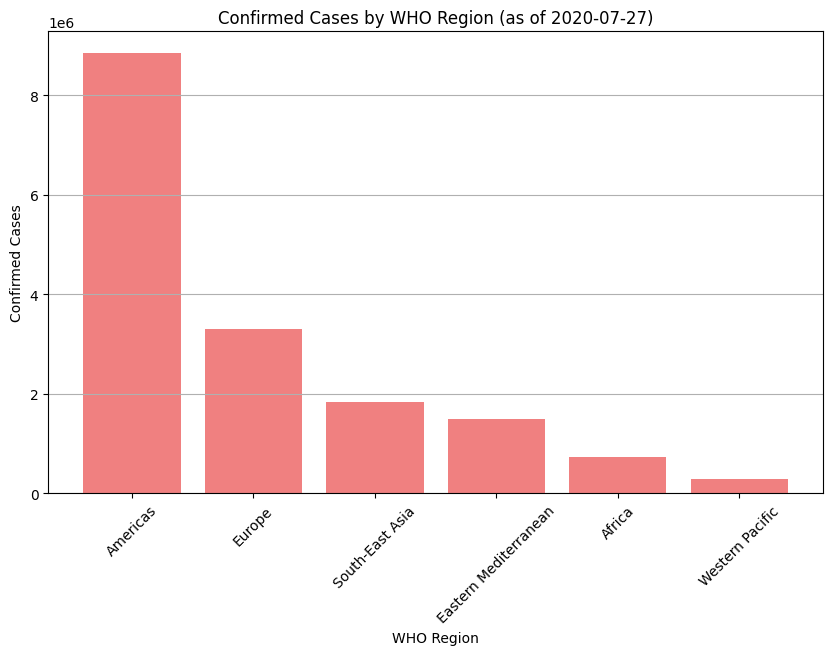

In [14]:
# put your answer here
# Get the latest date
latest_date = df['Date'].max()

# Filter for the latest date and aggregate by WHO Region
who_region_counts = df[df['Date'] == latest_date].groupby('WHO Region')['Confirmed'].sum().sort_values(ascending=False)

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(who_region_counts.index, who_region_counts.values, color='lightcoral')
plt.title(f'Confirmed Cases by WHO Region (as of {latest_date.date()})')
plt.xlabel('WHO Region')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## C. Geographic Visualization

6. Geographic Spread `(10 pts)`

Using Latitude and Longitude, create a map-based visualization showing confirmed cases for a selected date.

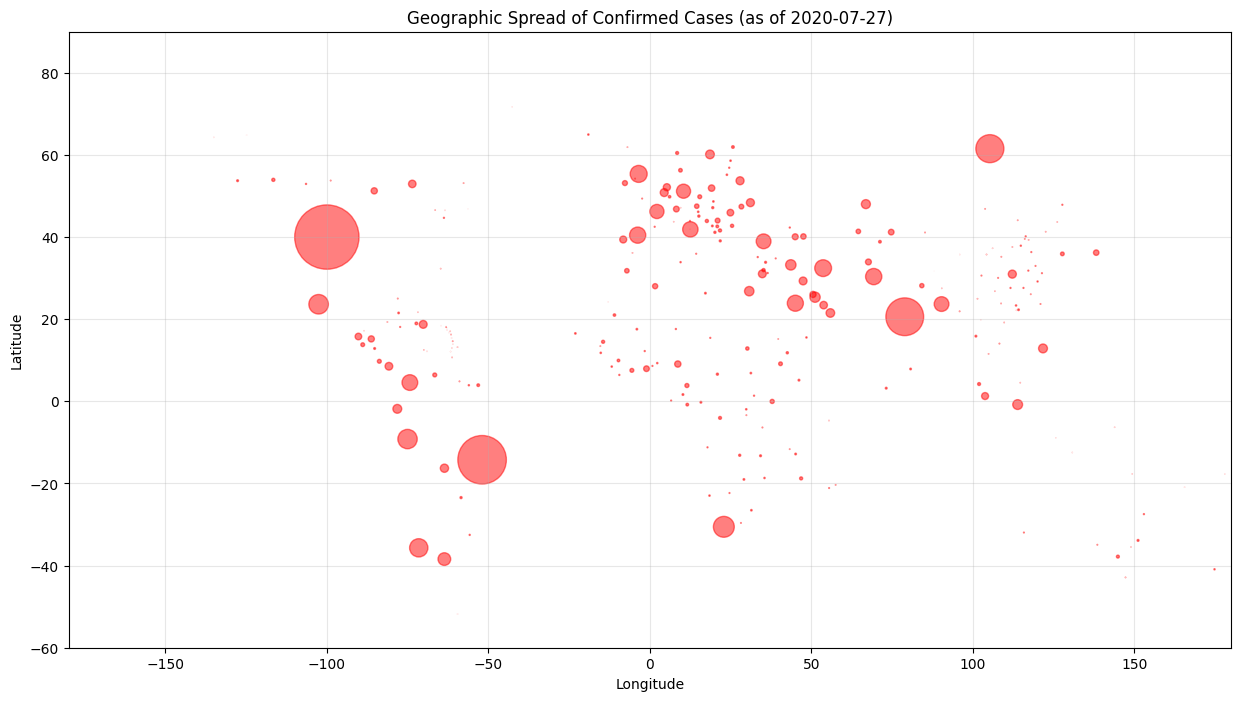

In [15]:
# put your answer here
# Get latest date data
latest_date = df['Date'].max()
geo_data = df[(df['Date'] == latest_date) & (df['Confirmed'] > 0)]

plt.figure(figsize=(15, 8))
# Plot scatter: x=Long, y=Lat, size=Confirmed
# We scale the size to make the bubbles visible but not overwhelming
sizes = geo_data['Confirmed'] / 2000

plt.scatter(geo_data['Long'], geo_data['Lat'], s=sizes, alpha=0.5, c='red')

plt.title(f'Geographic Spread of Confirmed Cases (as of {latest_date.date()})')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, alpha=0.3)
plt.xlim(-180, 180)
plt.ylim(-60, 90) # Limit Y-axis to focus on inhabited areas
plt.show()

7. Regional Clustering `(15 pts)`

Create a visualization that shows how confirmed cases are distributed geographically within a single WHO Region.

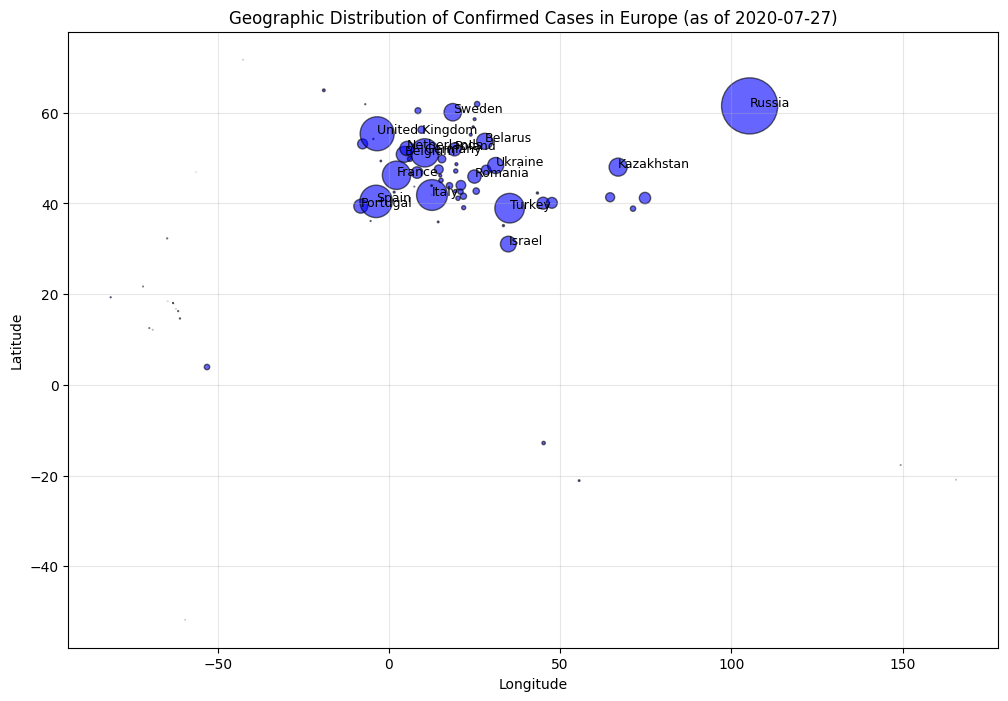

In [16]:
# put your answer here
# Select a region
region = 'Europe'
latest_date = df['Date'].max()

# Filter data
region_data = df[(df['Date'] == latest_date) & (df['WHO Region'] == region) & (df['Confirmed'] > 0)]

plt.figure(figsize=(12, 8))

# Scale sizes for better visibility in a regional map
sizes = region_data['Confirmed'] / 500

plt.scatter(region_data['Long'], region_data['Lat'], s=sizes, alpha=0.6, c='blue', edgecolors='black')

# Add country labels for context
for i, txt in enumerate(region_data['Country/Region']):
    if region_data.iloc[i]['Confirmed'] > region_data['Confirmed'].mean(): # Label only major outbreaks to avoid clutter
        plt.annotate(txt, (region_data.iloc[i]['Long'], region_data.iloc[i]['Lat']), fontsize=9)

plt.title(f'Geographic Distribution of Confirmed Cases in {region} (as of {latest_date.date()})')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, alpha=0.3)